In [1]:
#Rail notes

# 2559 entries in rail
# two marketing campaigns (ABM and INNOTRANS)
# Focused in Central Europe

# AdTypes: Programmatic', 'Social media', 'Email', 'Display', Content syndication', 'Social email

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset/Advertising.csv", low_memory = False, usecols = lambda c: not c.startswith("Unnamed:"), parse_dates = ['Week'])


['Commercial' 'Country' 'Datacenter' 'IT' 'MOEM' 'MTL' 'PQ' 'Rail'
 'Residential' 'IT Channel'] 1039
['OPM' 'Converged Infrastructure' 'Converged Infrastructure/OPM' 'DCM'
 'PAP']
74682.52714367921


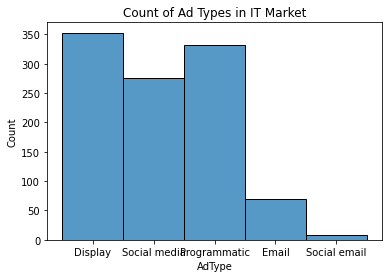

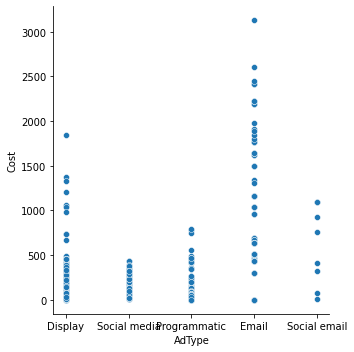

In [4]:
#look at DF rail and sort by SEASON

dfRail = df.copy()
dfRail = dfRail.loc[(dfRail["Segment"] == "IT") & (dfRail["AdType"] != "Content syndication")]
#sns.set(rc = {'figure.figsize':(13,8)})

# TODO: Need to find a segment which has an equal spread of adtypes? 
# Or I could compare to seeimingly polarized segments that use different adtypes and discuss what factors lead to their success?

print(df["Segment"].unique(), dfRail.shape[0])

# 2559 in rail

print(dfRail["Season"].unique())

#ABM INNOTRANS MARKETING CAMPAIGN

# looks to be dominated by Programmatic lmoast completely?? 
sns.histplot(data=dfRail, x="AdType").set(title = "Count of Ad Types in IT Market")


sns.relplot(data = dfRail, x = "AdType", y = dfRail["Cost"]) 

# IT looks pretty well balanced.

EmailtotPrice = dfRail.loc[dfRail["AdType"] == "Email"]
Total_Price = EmailtotPrice["Cost"].sum()
print(EmailtotPrice["Cost"].sum())

# Email -> 



In [5]:
# breaking up IT by adtype

print(dfRail["AdType"].unique())

dfRailD = dfRail.loc[dfRail["AdType"] == "Display"]
print("Display: ", dfRailD["Clicks"].sum())

dfRailSM = dfRail.loc[dfRail["AdType"] == "Social media"]
print("Social Media: ",dfRailSM["Clicks"].sum())

dfRailP = dfRail.loc[dfRail["AdType"] == "Programmatic"]
print("Programmatic: ",dfRailP["Clicks"].sum())

dfRailE = dfRail.loc[dfRail["AdType"] == "Email"]
print("Email: ",dfRailE["Clicks"].sum())

dfRailSE = dfRail.loc[dfRail["AdType"] == "Social email"]
print("Social Email: ",dfRailSE["Clicks"].sum())


# SOCIAL MEDIA LOOKS VERY GOOD :D 
#sns.relplot(data = dfRailSM, x = "Cost", y = "Clicks") 


# engagement factor on emails is not proportional to the cost.

['Display' 'Social media' 'Programmatic' 'Email' 'Social email']
Display:  2053
Social Media:  3737
Programmatic:  6192
Email:  5098
Social Email:  187


In [6]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

/tmp/ipykernel_231/2970181590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


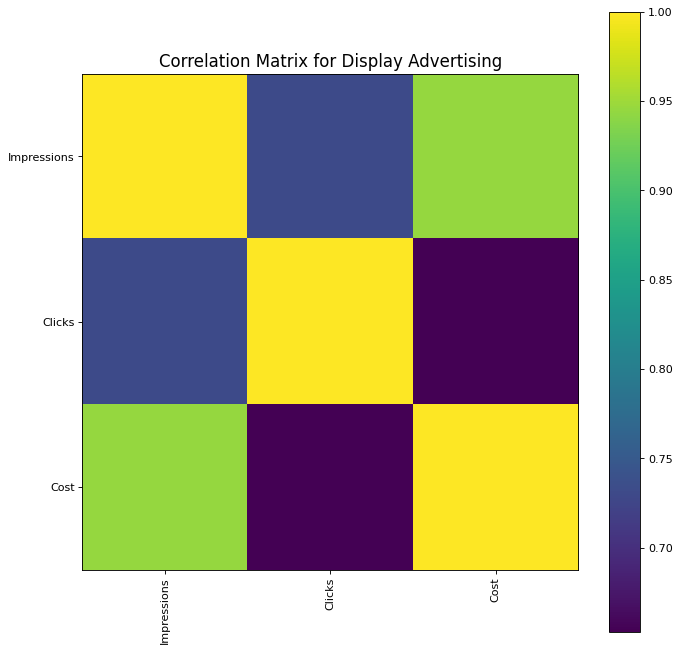

             Impressions    Clicks      Cost
Impressions     1.000000  0.731496  0.945604
Clicks          0.731496  1.000000  0.653142
Cost            0.945604  0.653142  1.000000


array(['Sizmek', 'Programmatic Buying', 'LinkedIn'], dtype=object)

In [28]:
dfRail.dataframeName = 'Programmatic Advertising'

dfRailCM = dfRailP.copy()
dfRailCM = dfRailCM.drop(columns = ["Week", "Num_Week", "Month", "Year", "Leads", "Opens"])
dfRailCM.dataframeName = 'Display Advertising'
   
plotCorrelationMatrix(dfRailCM, 10)

print(dfRailCM.corr())

dfRailCM["Publication"].unique()


In [33]:
dfRailE["Segment"].unique()

array(['IT'], dtype=object)

          Week  Impressions  Clicks  Opens  Leads Segment  \
0   2017-11-06         28.0       0      0      0      IT   
1   2017-03-27       1616.0       0      0      0      IT   
2   2017-03-20       3068.0       0      0      0      IT   
3   2017-03-27       1932.0       0      0      0      IT   
4   2016-12-05         54.0       0      0      0      IT   
..         ...          ...     ...    ...    ...     ...   
326 2016-10-24      52682.0     101      0      0      IT   
327 2017-03-27     303438.0     110      0      0      IT   
328 2017-03-13     301045.0     138      0      0      IT   
329 2016-11-07     113316.0     148      0      0      IT   
330 2016-10-31     114755.0     175      0      0      IT   

                       Season CountryISO     CountryName           Region  \
0                         OPM         GB  United Kingdom  Northern Europe   
1                         OPM         BE         Belgium  Northern Europe   
2                         OPM       

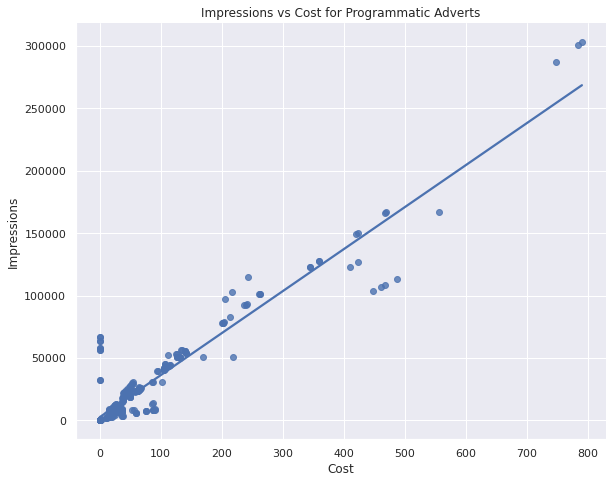

['Month' 'Impressions']


In [67]:
sns.set(rc = {'figure.figsize':(10,8)})

dfRailD_temp = dfRailP.copy()
dfRailD_temp = dfRailD_temp.sort_values(by = "Clicks").reset_index(drop = True)
dfRailD_temp.drop(index=dfRailD_temp.index[-1],axis=0,inplace=True)

print(dfRailD_temp)

f = sns.lmplot(data = dfRailD_temp, x = "Cost", y = "Impressions", ci=None,).set(title = "Impressions vs Cost for Programmatic Adverts")
f.fig.set_size_inches(10,7)


plt.show()

print(dfRailSM["BuyingBasis"].unique())